# Exploratory Data analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Type ,Name origin and name destination are of object type, we have to implent some techiques to convert them into numerical feature if required

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no Nan values in the dataset. All values are present , Now we have to check for duplicates

In [6]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


There are no duplicate records

In [7]:
for i in ["nameOrig","nameDest","isFraud","isFlaggedFraud"]:   #Trying to fetch the details of these columns
    print(df[i].value_counts())
    print('='*100)    

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


It seems like in this dataset number of fraud transactions are very less when compared to non fradulent

label encoding type of payment into numerical category and converting step into time at which transcation had happened

In [8]:
from sklearn.preprocessing import LabelEncoder
encdr= LabelEncoder()

In [9]:
#Encoding the type of payment
df["type"]=encdr.fit_transform(df["type"])

In [10]:
df["Trns_time"] = df["step"].apply(lambda x : x%24 )  #DEriving a feture "Trns_time" which tells us about in whole day at what time
                                                       #that paticular tarnsaction has taken place

In [11]:
#Time is in 24 hour formate
df["Trns_time"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Trns_time
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [13]:
#segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

print("numerical columns",numerical_columns)
print('categorical columns',categorical_columns)

numerical columns Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'Trns_time'],
      dtype='object')
categorical columns Index(['nameOrig', 'nameDest'], dtype='object')


In [14]:
df[numerical_columns].describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Trns_time
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.532145e+01
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.321799e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.600000e+01
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.900000e+01
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,2.300000e+01


In [15]:
df[categorical_columns].describe()

,nameOrig,nameDest
count,6362620,6362620
unique,6353307,2722362
top,C1902386530,C1286084959
freq,3,113


As almost number of transactions and origin account are same, no use of it so we will drop it 

lets encode destination name as there are some frequently transcted accounts which are potentially of fradulent

In [16]:
df["nameDest"]=encdr.fit_transform(df["nameDest"]) #label encoding "nameDest"

In [17]:
# I dont need "nameOrig" and "step" so not taking them for tarining the model
X = df.drop(["isFraud","nameOrig","step"],axis=1) #taking all the trainable features in X
Y = df["isFraud"] #output is stored in Y

In [18]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,Trns_time
0,3,9839.64,170136.0,160296.36,1662094,0.0,0.0,0,1
1,3,1864.28,21249.0,19384.72,1733924,0.0,0.0,0,1
2,4,181.00,181.0,0.00,439685,0.0,0.0,0,1
3,1,181.00,181.0,0.00,391696,21182.0,0.0,0,1
4,3,11668.14,41554.0,29885.86,828919,0.0,0.0,0,1


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

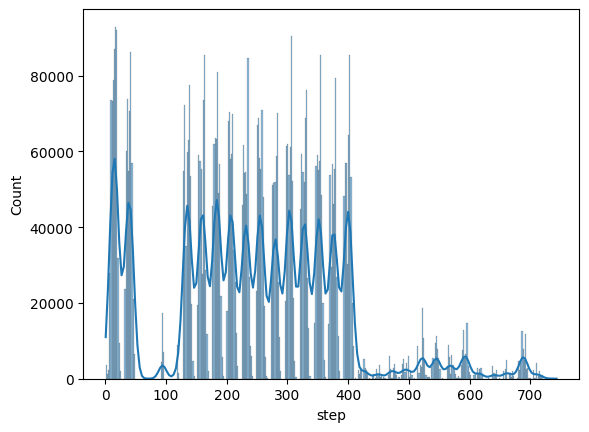

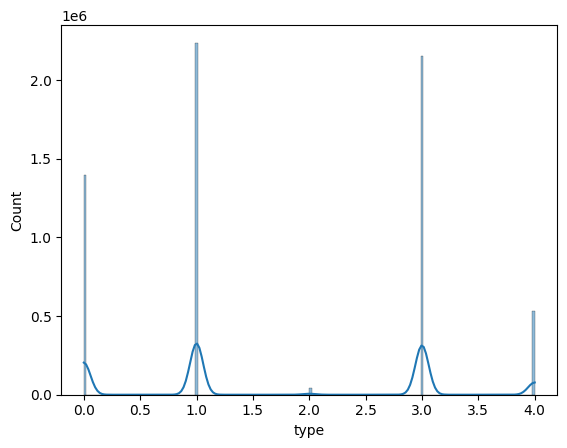

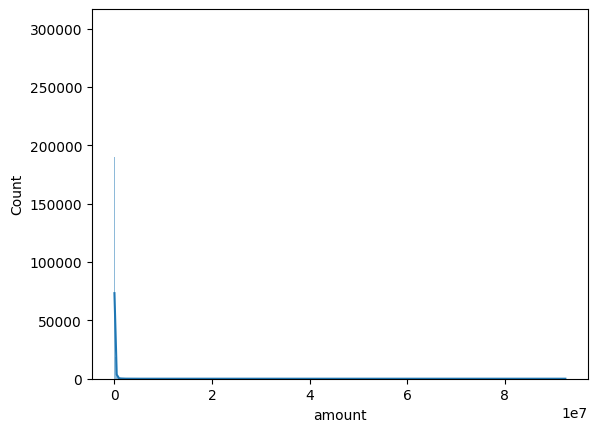

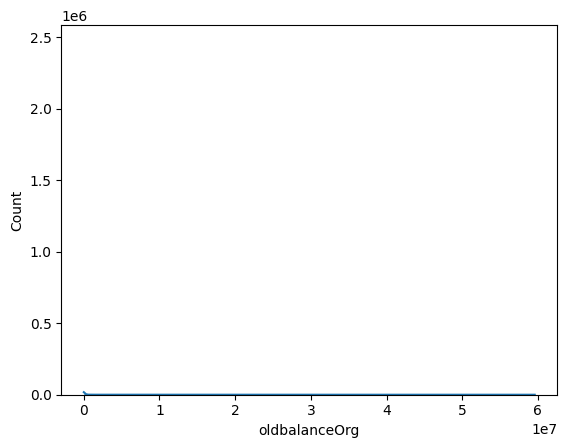

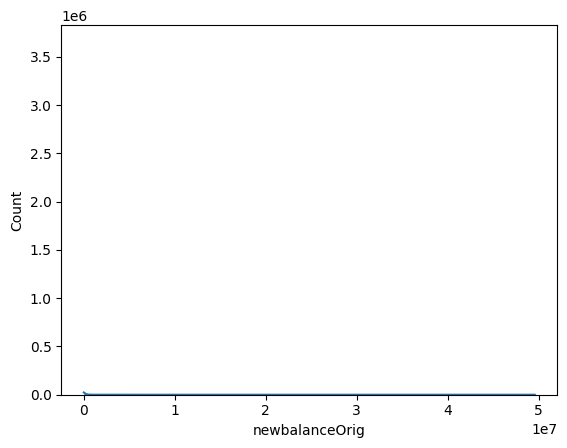

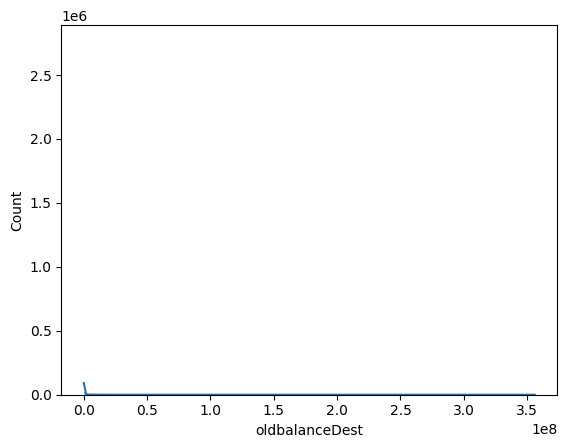

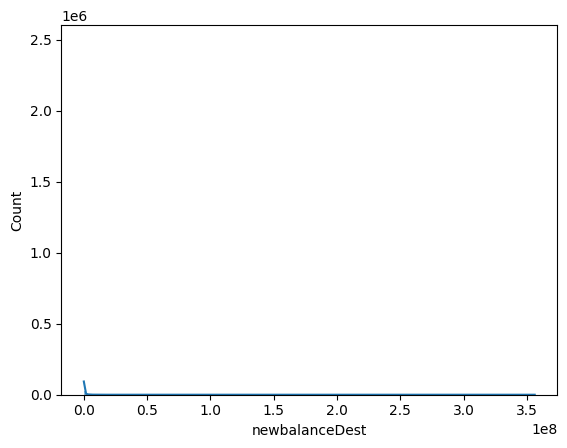

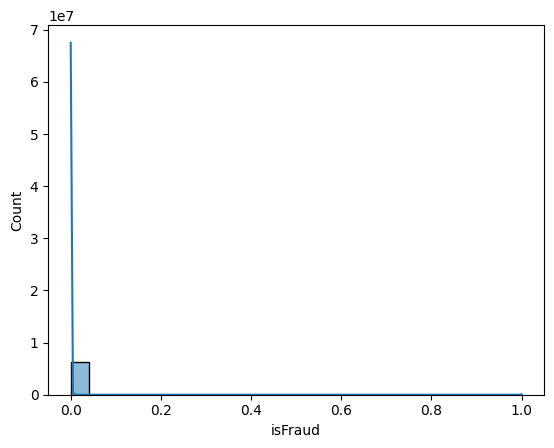

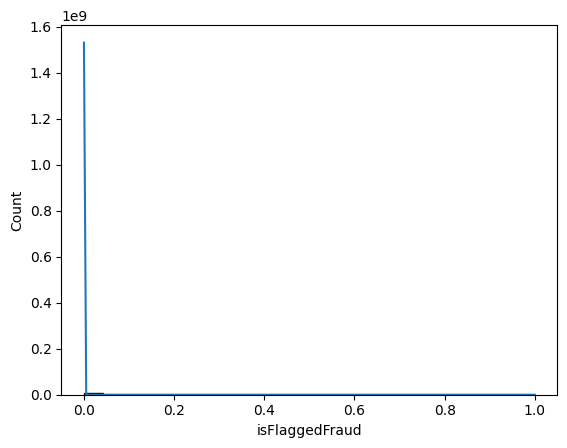

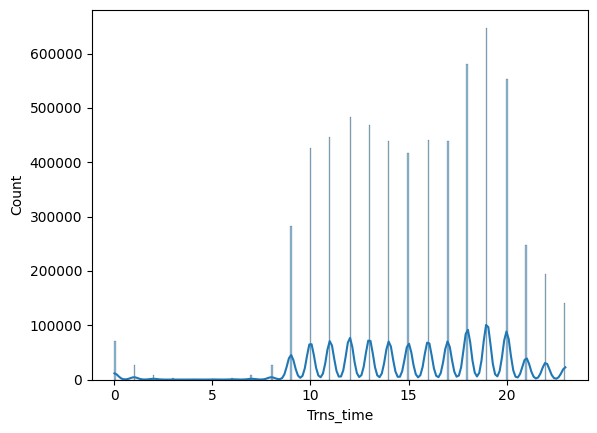

In [20]:
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

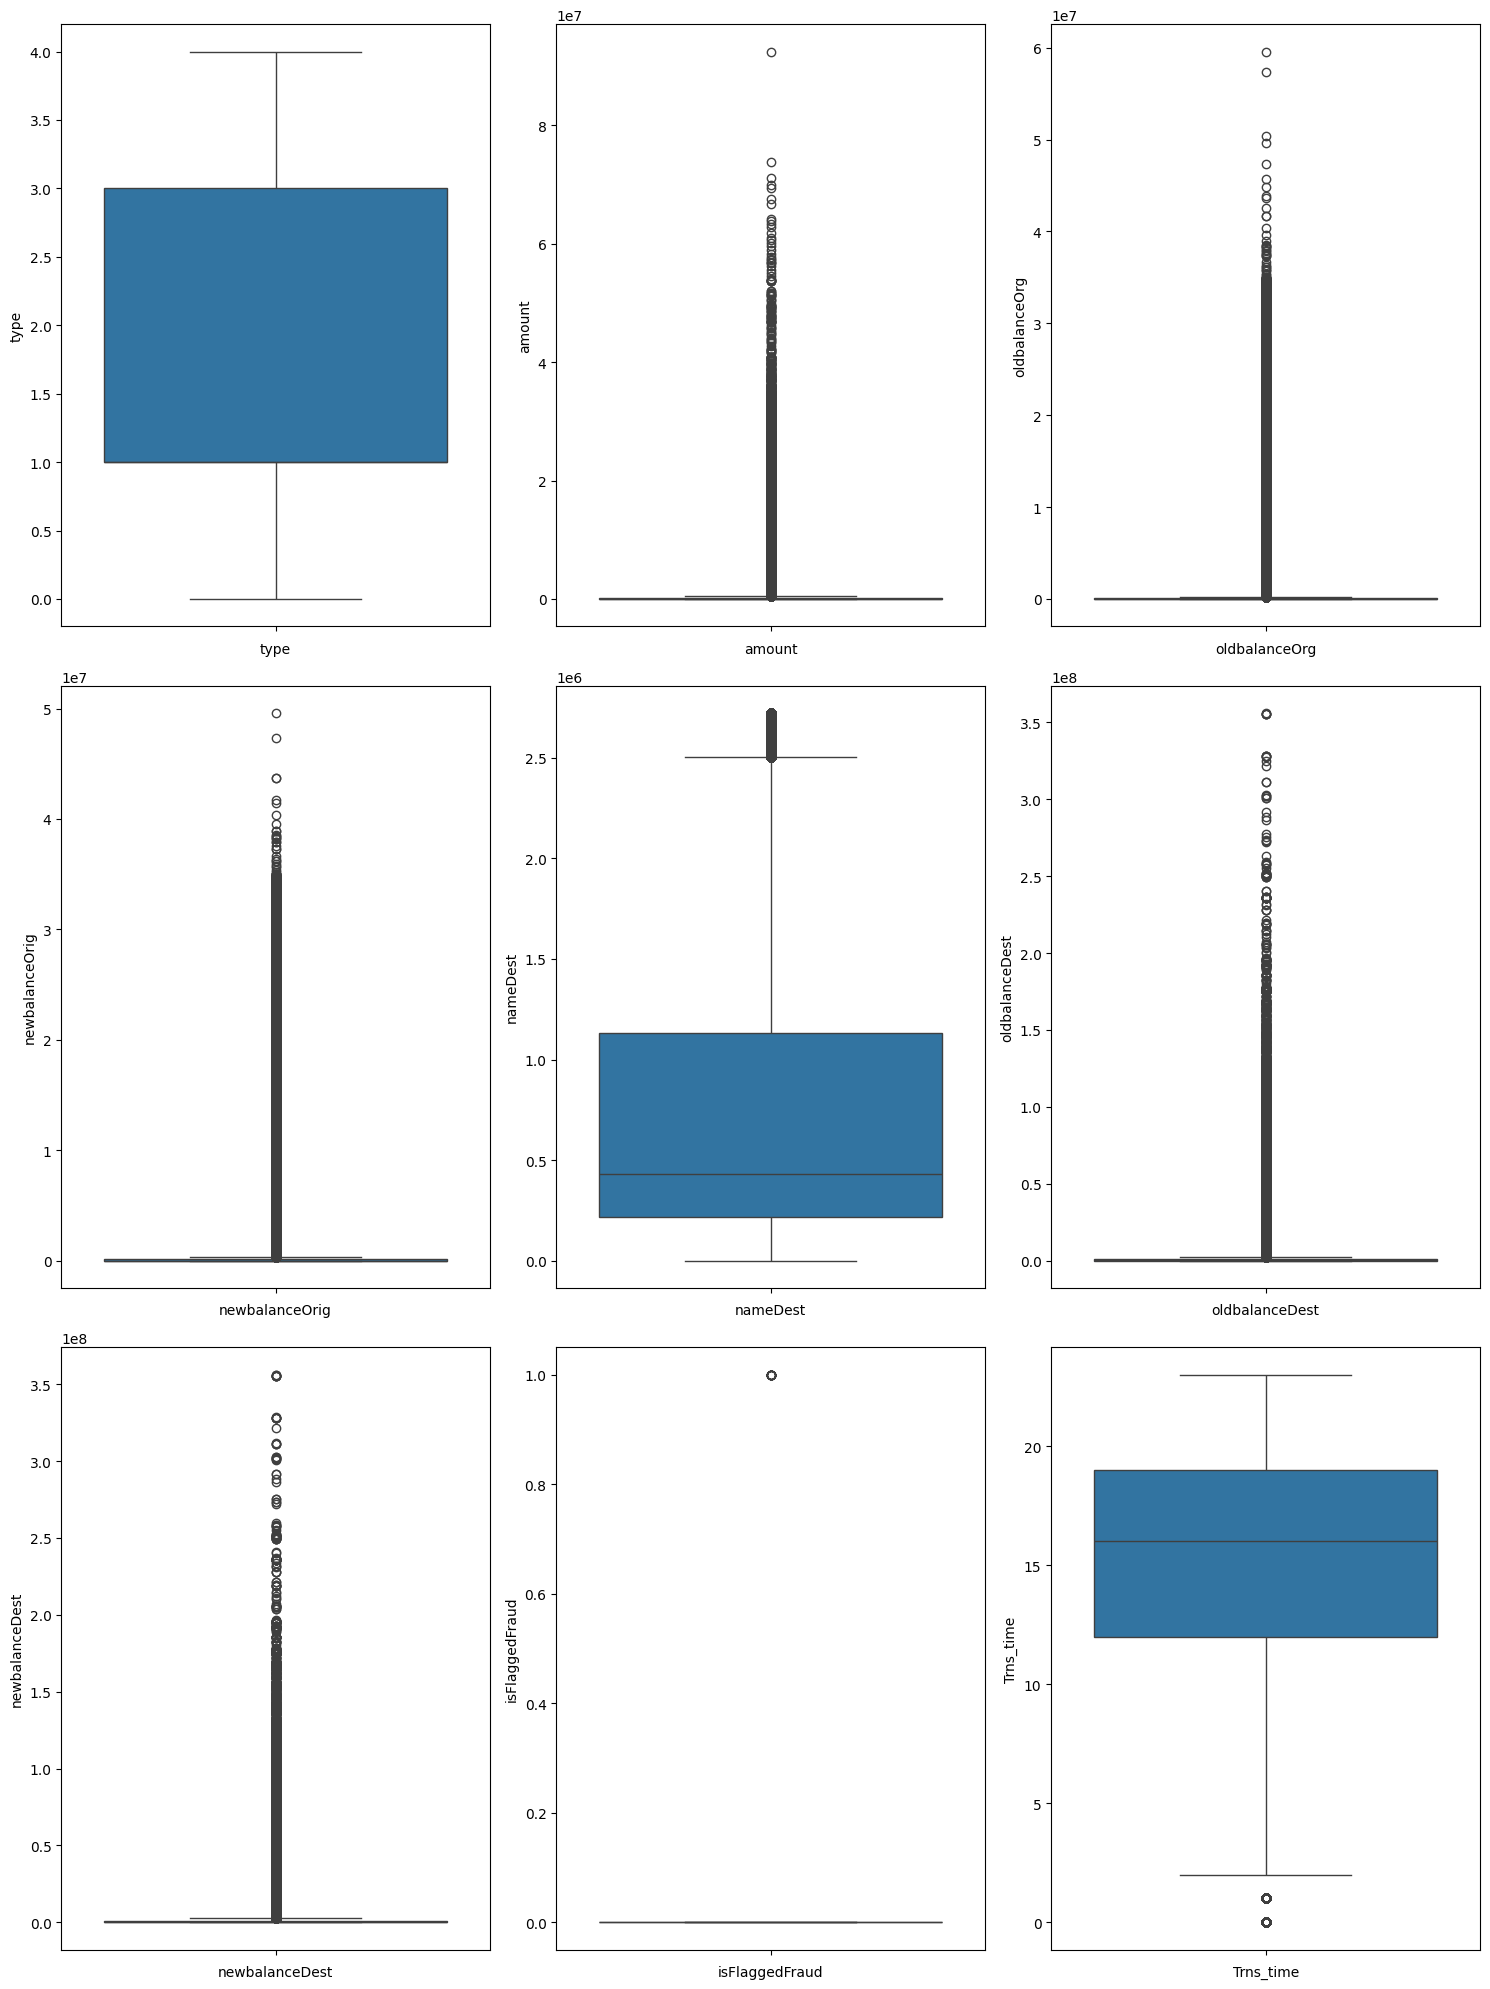

In [21]:
plt.figure(figsize=(15,20))
plotnumber=1
for i in X.columns:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,)
    plotnumber+=1
plt.tight_layout()
plt.show()

Data sholud be prepeocessed(normalize) before training model as there are lot of outliers

# Model Training

In [22]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=17)

In [23]:
# As we have to transform the data.So,I'm making a custom fuction which takes input as diffrent types of preprocessor, train dataset 
# and test dataset and try to fit with availabel models

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
def model_performance(preprocessor,xtrain,xtest,ytrain,ytest):
    models={
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
        'GradientBoostingClassifier':GradientBoostingClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'SVC':SVC(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'RidgeClassifier': RidgeClassifier()
    }
    for name,model in models.items():
        pipeline=make_pipeline(preprocessor,model)
        pipeline.fit(xtrain,ytrain)
        ypred=pipeline.predict(xtest)

        #checking the metrics of model

        matrix=confusion_matrix(ytest,ypred)
        report=classification_report(ytest,ypred)

        print(f'{name}---confusion_matrix---')
        print(f' {matrix}')
        print(f'{name}---classification_report---')
        print(f"{report}\n")

In [41]:
preprocessor_01=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
preprocessor_02=make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())
preprocessor_03=make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())

In [26]:
print("=============== StandardScaler================")
model_performance(preprocessor_01,Xtrain,Xtest,ytrain,ytest)

=============== StandardScaler================
DecisionTreeClassifier---confusion_matrix---
 [[1906052     249]
 [    351    2134]]
DecisionTreeClassifier---classification_report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906301
           1       0.90      0.86      0.88      2485

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786


GaussianNB---confusion_matrix---
 [[1900473    5828]
 [   2206     279]]
GaussianNB---classification_report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906301
           1       0.05      0.11      0.06      2485

    accuracy                           1.00   1908786
   macro avg       0.52      0.55      0.53   1908786
weighted avg       1.00      1.00      1.00   1908786


GradientBoostingClassifier---confusion_matrix---
 [

For us identifying the fraud transcation matters a lot i.e we are fine with classifying normal transactions as fraud but not fraud transactions as legitimate.so, recall matters and precession for us in this situation

In [27]:
# I used standard scaler here for preprocessing, we might get same trend of metrics even for other preprocessings like robustscalaer and minimaxscaler
# when comapred to all models DecisionTreeClassifier gives us the best recall(which is our intreset) and precession 

# Hyperparameter tuning (Finetuning)

In [28]:
from sklearn.model_selection import GridSearchCV

classifier=DecisionTreeClassifier(random_state=17)

param_gris={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6,7,8,9]
}

grid=GridSearchCV(classifier,param_gris,cv=5,verbose=1)

In [30]:
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [31]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}

In [32]:
ypred = grid.predict(Xtest)

In [33]:
confusion_matrix(ytest,ypred)

array([[1906229,      72],
       [    595,    1890]], dtype=int64)

In [35]:
print(classification_report(ytest,ypred)) # these is where preprocessing of data play a huge role ... even with best prameters the recall reduced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906301
           1       0.96      0.76      0.85      2485

    accuracy                           1.00   1908786
   macro avg       0.98      0.88      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [36]:
classifier=DecisionTreeClassifier(random_state=17,criterion='entropy',max_depth= 9, splitter='best')

In [50]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [47]:
pipeline=make_pipeline(preprocessor_03,classifier)
pipeline.fit(Xtrain,ytrain)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=3)),
                                 ('minmaxscaler', MinMaxScaler())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        random_state=17))])

In [48]:
ypred = pipeline.predict(Xtest)

In [49]:
print(classification_report(ytest,ypred)) #we are able to get good precession but for our case we need more recall... so, initial training gave us the best result so better to use that!!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906301
           1       0.97      0.75      0.85      2485

    accuracy                           1.00   1908786
   macro avg       0.98      0.88      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

